In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [57]:
df = pd.read_csv('heart_disease.csv')

In [58]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,45.0,F,ASY,120.0,263.0,0.0,Normal,159.0,N,0.0,Up,0
1,58.0,M,ASY,116.0,239.0,0.0,LVH,154.0,Y,1.0,Flat,1
2,61.0,F,ATA,130.0,192.0,0.0,Normal,133.0,N,1.0,Flat,0
3,64.0,M,ASY,167.0,209.0,1.0,Normal,108.0,Y,3.0,Down,1
4,50.0,M,ASY,141.0,0.0,1.0,ST,157.0,N,0.0,Flat,1
5,56.0,M,ATA,116.0,263.0,0.0,Normal,138.0,N,0.0,Up,1
6,64.0,M,ASY,111.0,0.0,0.0,Normal,89.0,Y,0.0,Flat,1
7,57.0,M,NAP,163.0,0.0,0.0,Normal,76.0,Y,0.0,Flat,1
8,56.0,M,ASY,150.0,171.0,0.0,LVH,112.0,Y,3.0,Down,1
9,56.0,M,ASY,171.0,266.0,0.0,Normal,79.0,N,2.0,Flat,1


In [59]:
num_instances = len(df)
print(f"Number of instances in the DataFrame: {num_instances}")

Number of instances in the DataFrame: 15000


In [60]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.30920,133.075467,191.091867,0.271933,133.880133,1.030467,0.700000
std,9.63541,19.852551,117.057733,0.444971,25.911356,1.113802,0.458273
min,25.00000,0.000000,0.000000,0.000000,55.000000,0.000000,0.000000
25%,48.00000,120.000000,152.000000,0.000000,116.000000,0.000000,0.000000
50%,55.00000,131.000000,220.000000,0.000000,132.000000,1.000000,1.000000
75%,61.00000,144.000000,267.000000,1.000000,152.000000,2.000000,1.000000
max,83.00000,225.000000,653.000000,1.000000,221.000000,7.000000,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             15000 non-null  float64
 1   Sex             15000 non-null  object 
 2   ChestPainType   15000 non-null  object 
 3   RestingBP       15000 non-null  float64
 4   Cholesterol     15000 non-null  float64
 5   FastingBS       15000 non-null  float64
 6   RestingECG      15000 non-null  object 
 7   MaxHR           15000 non-null  float64
 8   ExerciseAngina  15000 non-null  object 
 9   Oldpeak         15000 non-null  float64
 10  ST_Slope        15000 non-null  object 
 11  HeartDisease    15000 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 1.4+ MB


In [62]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [63]:
df.dropna(inplace=True)

In [64]:
df.duplicated().sum()

np.int64(9)

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_col = 'HeartDisease'
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

Age outliers: 39
RestingBP outliers: 311
Cholesterol outliers: 138
FastingBS outliers: 0
MaxHR outliers: 32
Oldpeak outliers: 40


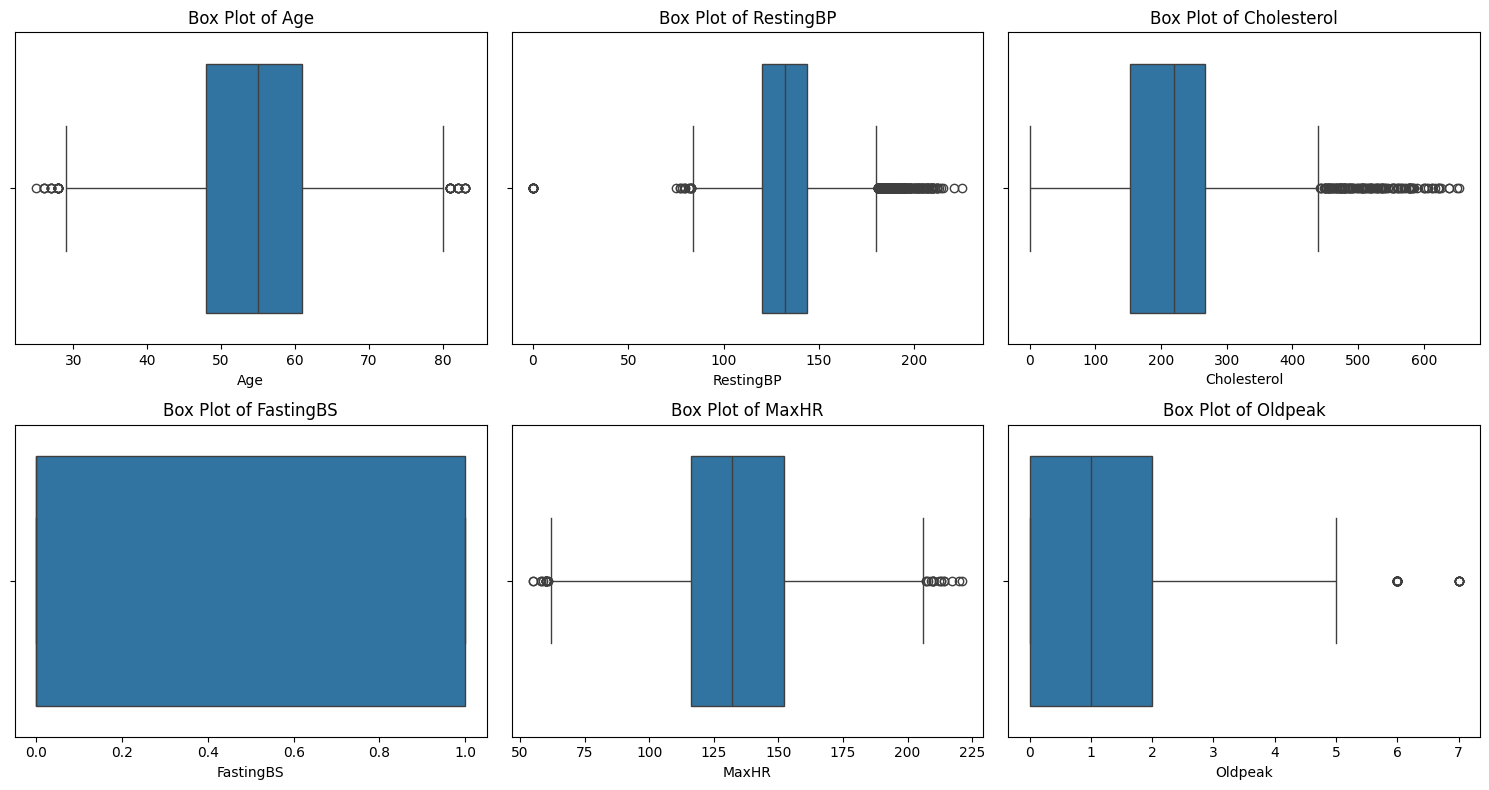

In [69]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

# Print outlier counts per numerical column
for col in numerical_cols:
    count = detect_outliers_iqr(df, col).shape[0]
    print(f"{col} outliers: {count}")

# Display box plots for numerical columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)+1)//2, i)  # Arrange plots in 2 rows
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()



Shape of DataFrame after outlier removal: (14426, 12)

Outliers count after removal:
Age outliers: 0
RestingBP outliers: 0
Cholesterol outliers: 0
FastingBS outliers: 0
MaxHR outliers: 0
Oldpeak outliers: 0


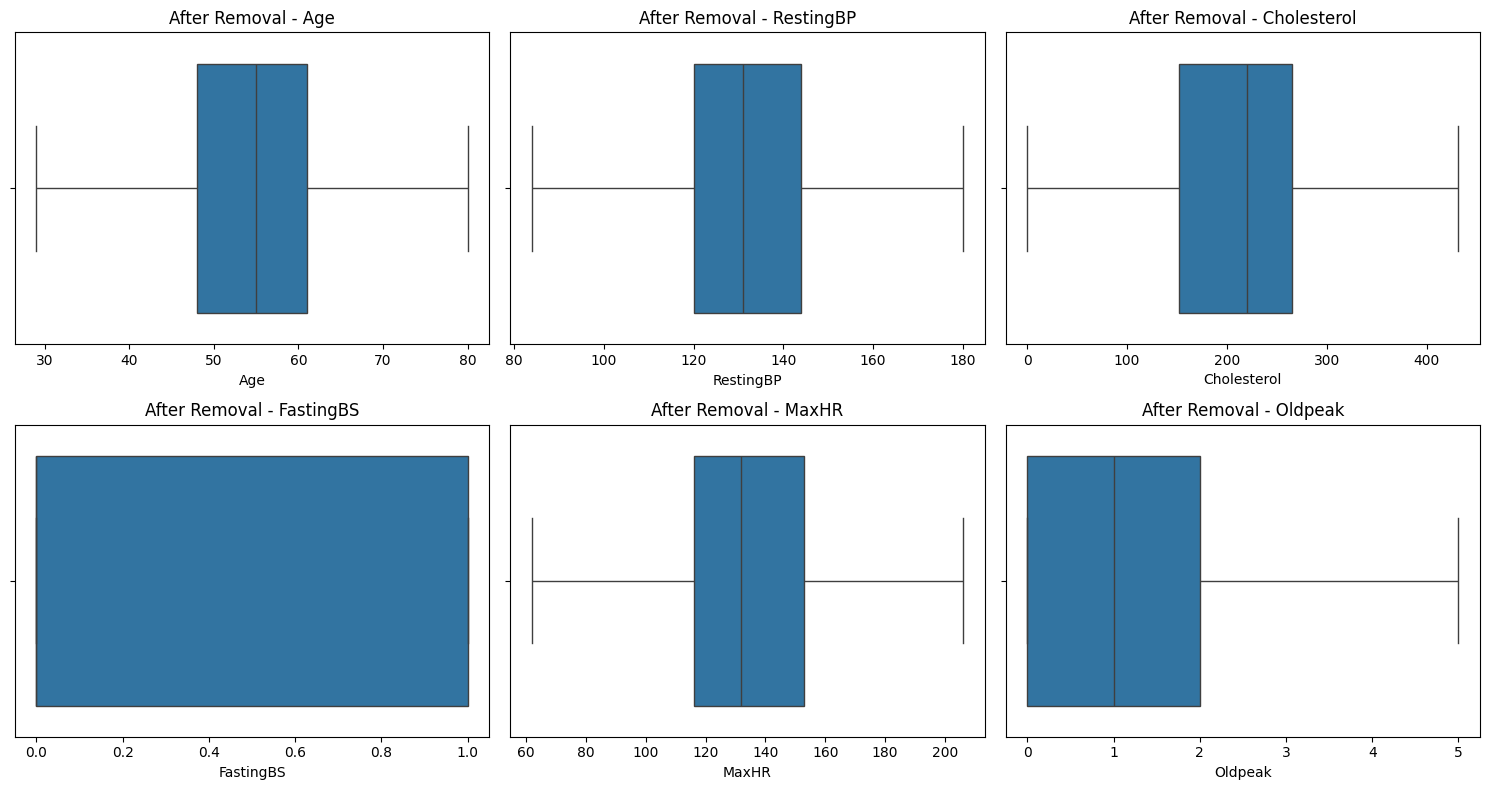

In [70]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"\nShape of DataFrame after outlier removal: {df.shape}")

# Print outlier counts after removal (should be zero or near zero)
print("\nOutliers count after removal:")
for col in numerical_cols:
    count = detect_outliers_iqr(df, col).shape[0]
    print(f"{col} outliers: {count}")

# Show box plots after removal
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, (len(numerical_cols)+1)//2, i)
    sns.boxplot(x=df[col])
    plt.title(f'After Removal - {col}')
plt.tight_layout()
plt.show()

In [71]:
ordinal_mappings = {
    'ST_Slope': ['Up', 'Flat', 'Down'],
    'ChestPainType': ['TA', 'ATA', 'NAP', 'ASY']
}
label_encoders = {}

for col in categorical_cols:
    # Convert to string to avoid dtype issues
    df[col] = df[col].astype(str)
    if col in ordinal_mappings:
        # Check if all values are in the mapping
        unique_vals = set(df[col].unique())
        mapping_vals = set(ordinal_mappings[col])
        if not unique_vals.issubset(mapping_vals):
            print(f"Warning: {col} has values not in ordinal_mappings: {unique_vals - mapping_vals}")
        df[[col]] = OrdinalEncoder(categories=[ordinal_mappings[col]]).fit_transform(df[[col]])
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [72]:
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [73]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

X_train_processed = pd.concat([X_train_scaled_df, X_train[categorical_cols]], axis=1)
X_test_processed = pd.concat([X_test_scaled_df, X_test[categorical_cols]], axis=1)

Class distribution before SMOTE:
HeartDisease
1    7036
0    3062
Name: count, dtype: int64


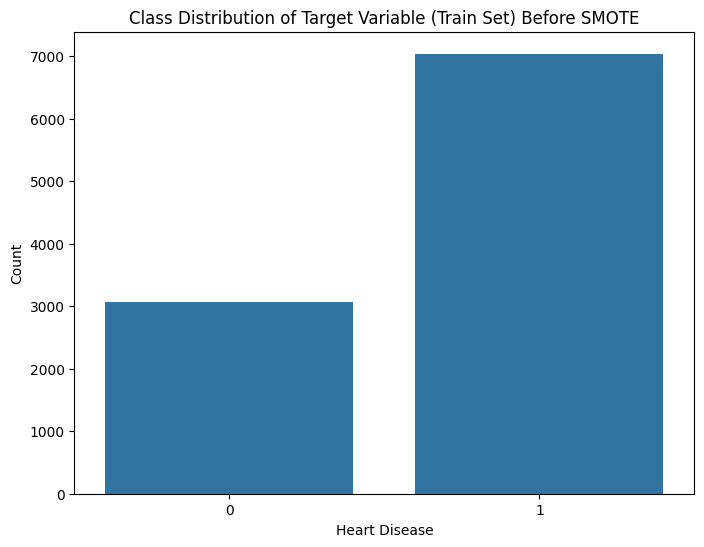

In [74]:
# Check class balance of the target variable
print("Class distribution before SMOTE:")
print(y_train.value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution of Target Variable (Train Set) Before SMOTE')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

Before SMOTE: HeartDisease
1    7036
0    3062
Name: count, dtype: int64
After SMOTE: HeartDisease
1    7036
0    7036
Name: count, dtype: int64


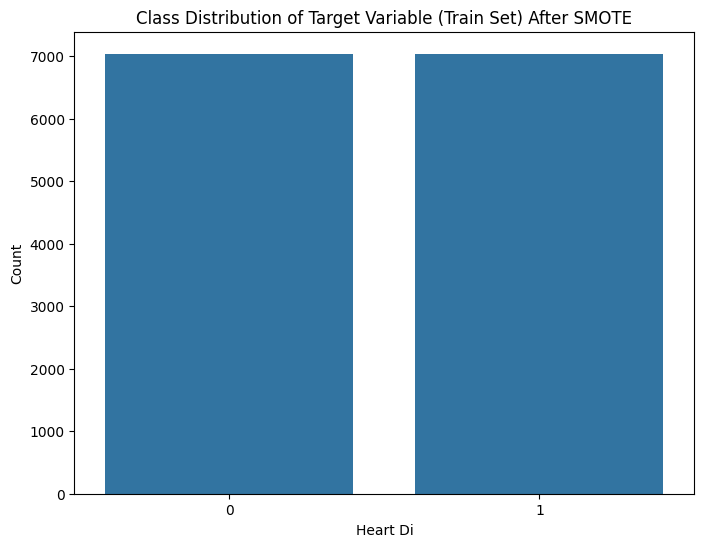

In [75]:
print("Before SMOTE:", y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("After SMOTE:", y_train_resampled.value_counts())

# Plot the class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution of Target Variable (Train Set) After SMOTE')
plt.xlabel('Heart Di')
plt.ylabel('Count')
plt.show()

Class distribution before applying other imbalance techniques:
HeartDisease
1    7036
0    3062
Name: count, dtype: int64


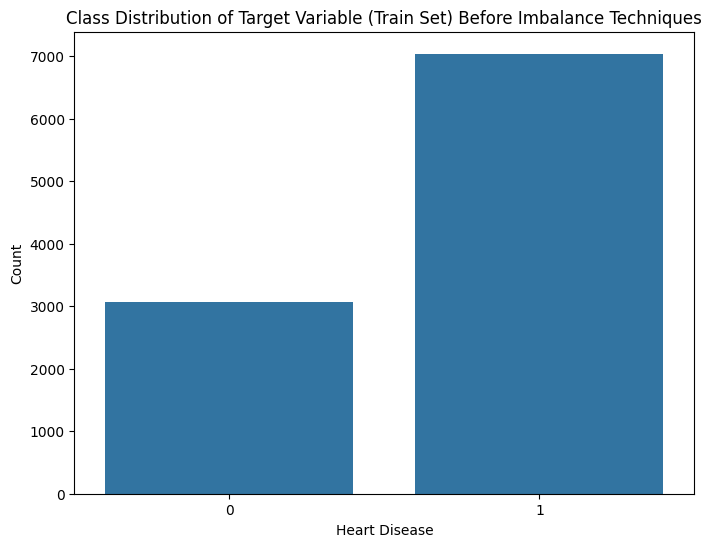

In [76]:
# Check class balance again before applying new techniques
print("Class distribution before applying other imbalance techniques:")
print(y_train.value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution of Target Variable (Train Set) Before Imbalance Techniques')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


--- Applying ADASYN ---
After ADASYN: HeartDisease
1    7036
0    6987
Name: count, dtype: int64


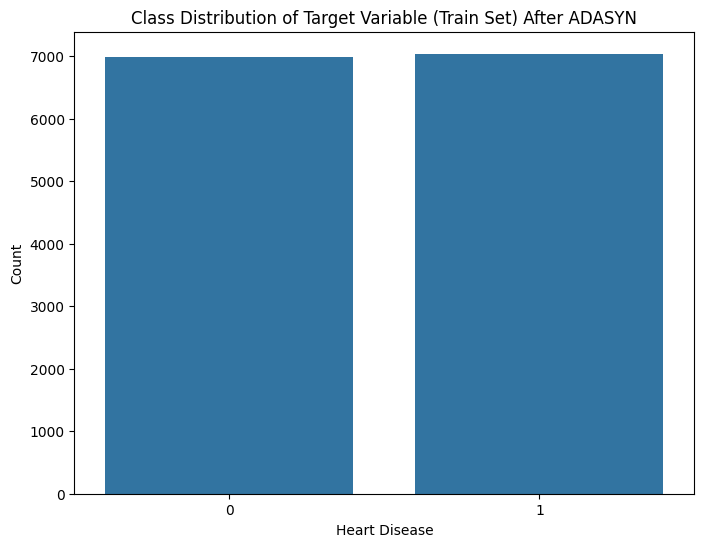

In [77]:
print("\n--- Applying ADASYN ---")
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_processed, y_train)

print("After ADASYN:", y_train_adasyn.value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_adasyn)
plt.title('Class Distribution of Target Variable (Train Set) After ADASYN')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()


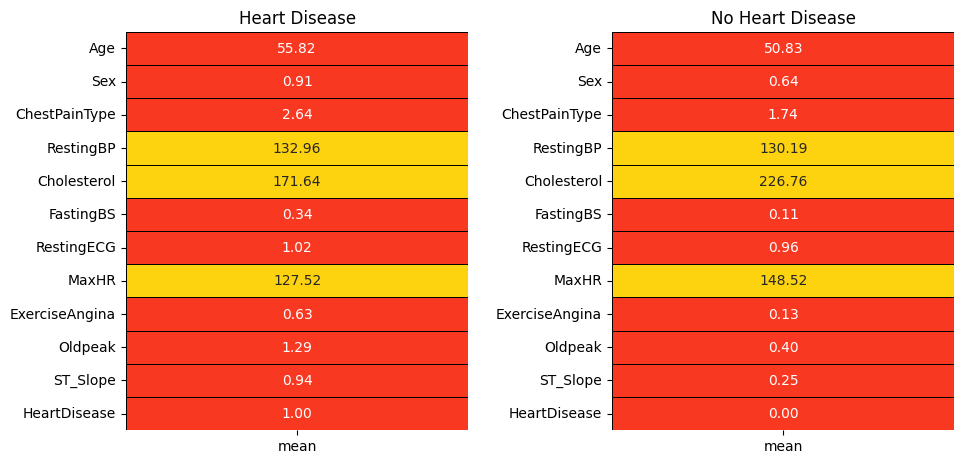

In [78]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
colors = ['#F93822', '#FDD20E']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Heart Disease')

plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Heart Disease')

fig.tight_layout(pad=2)
plt.show()

Best silhouette score 0.5474 with 2 PCA components.
Optimal k based on silhouette: 4

--- Clustering Metrics ---
KMeans Silhouette: 0.6524
Agglomerative Silhouette: 0.6398
KMeans DB Index: 0.4381
Agglomerative DB Index: 0.4730


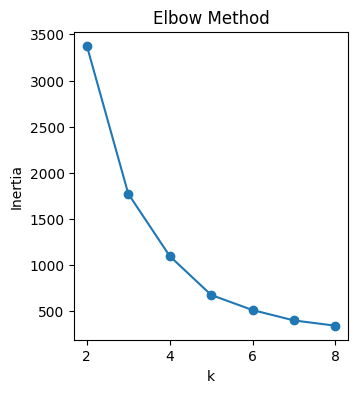

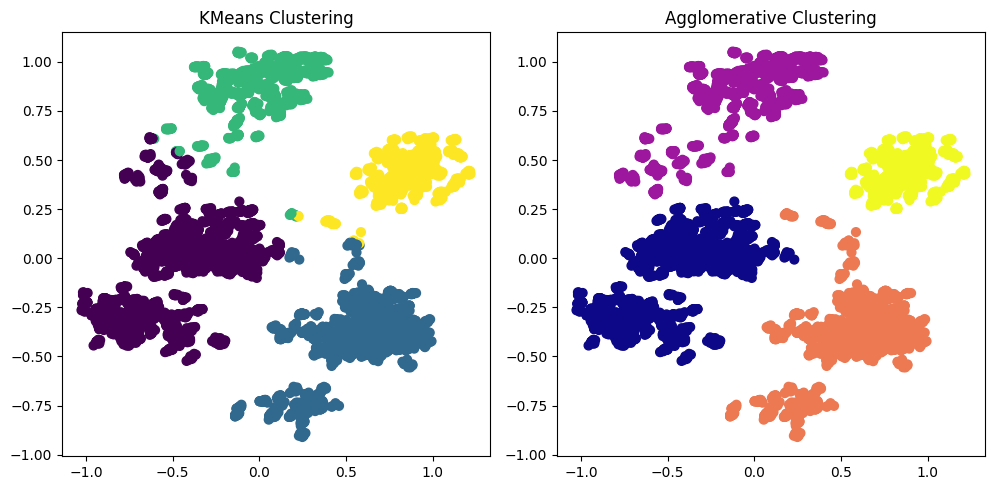

In [79]:
# 1. Preprocessing: Handle missing values and scale
X_clustering = X_train_resampled.copy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_clustering)

# 2. Determine optimal PCA components using silhouette score
best_silhouette = -1
best_n = 2
silhouette_scores = []
max_pca = min(10, X_scaled.shape[1])

for n in range(2, max_pca + 1):  # start from 2 for meaningful clustering
    pca = PCA(n_components=n, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=20)
    clusters = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, clusters)
    silhouette_scores.append(sil)
    if sil > best_silhouette:
        best_silhouette = sil
        best_n = n


print(f"Best silhouette score {best_silhouette:.4f} with {best_n} PCA components.")

# 3. Apply best PCA
pca = PCA(n_components=best_n, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 4. Elbow Method & Silhouette for Optimal k
inertia = []
silhouettes = []
max_k = 8
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    preds = kmeans.fit_predict(X_pca)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_pca, preds))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(range(2, max_k + 1), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")

# 5. Choose best k
k_optimal = np.argmax(silhouettes) + 2  # offset because k starts from 2
print(f"Optimal k based on silhouette: {k_optimal}")

# 6. Clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=20)
kmeans_clusters = kmeans.fit_predict(X_pca)

agg = AgglomerativeClustering(n_clusters=k_optimal, linkage='ward')
agg_clusters = agg.fit_predict(X_pca)

# 7. (Optional: Add cluster summary/statistics here)

# 8. Validation
print("\n--- Clustering Metrics ---")
print(f"KMeans Silhouette: {silhouette_score(X_pca, kmeans_clusters):.4f}")
print(f"Agglomerative Silhouette: {silhouette_score(X_pca, agg_clusters):.4f}")
print(f"KMeans DB Index: {davies_bouldin_score(X_pca, kmeans_clusters):.4f}")
print(f"Agglomerative DB Index: {davies_bouldin_score(X_pca, agg_clusters):.4f}")

# 9. Visualization
pca_vis = PCA(n_components=2, random_state=42)
X_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=kmeans_clusters, cmap='viridis', s=40)
plt.title("KMeans Clustering")

plt.subplot(1, 3, 2)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=agg_clusters, cmap='plasma', s=40)
plt.title("Agglomerative Clustering")

plt.tight_layout()
plt.show()



--- Univariate Feature Selection (SelectKBest) ---
Top 8 features selected by SelectKBest (f_classif):
['Age', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']

Feature Scores (SelectKBest - f_classif):
ST_Slope          6538.665738
ExerciseAngina    4829.089930
ChestPainType     4140.803897
Oldpeak           3037.275891
MaxHR             3011.588198
Sex               1523.155898
FastingBS         1166.556085
Age               1005.757181
Cholesterol       1000.836382
RestingBP           97.954989
RestingECG          36.414641
dtype: float64


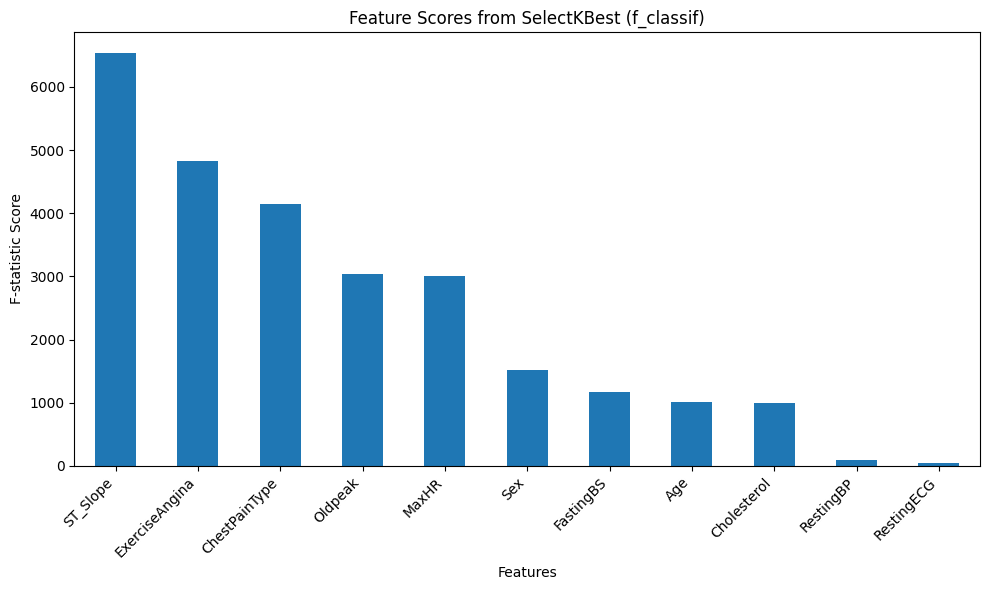

In [80]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
print("\n--- Univariate Feature Selection (SelectKBest) ---")

# Select top k features (e.g., k=5)
k_features = 8
selector_kbest = SelectKBest(score_func=f_classif, k=k_features) # Using f_classif

# Fit on the processed training data
selector_kbest.fit(X_train_resampled, y_train_resampled)

# Get the indices of the selected features
selected_features_kbest_indices = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest_names = X_train_resampled.columns[selected_features_kbest_indices]

print(f"Top {k_features} features selected by SelectKBest (f_classif):")
print(selected_features_kbest_names.tolist())

# Get the scores of the features
feature_scores_kbest = pd.Series(selector_kbest.scores_, index=X_train_resampled.columns)
feature_scores_kbest_sorted = feature_scores_kbest.sort_values(ascending=False)

print("\nFeature Scores (SelectKBest - f_classif):")
print(feature_scores_kbest_sorted)

# Visualize feature scores
plt.figure(figsize=(10, 6))
feature_scores_kbest_sorted.plot(kind='bar')
plt.title('Feature Scores from SelectKBest (f_classif)')
plt.ylabel('F-statistic Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



--- Model-based Feature Selection (RandomForestClassifier) ---

Feature Importances (RandomForestClassifier):
ST_Slope          0.238876
ChestPainType     0.159587
Cholesterol       0.110424
MaxHR             0.087604
ExerciseAngina    0.082388
Oldpeak           0.079513
RestingBP         0.066429
Age               0.065651
Sex               0.040857
RestingECG        0.034602
FastingBS         0.034069
dtype: float64

Top 8 features selected by RandomForestClassifier:
['ST_Slope', 'ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'RestingBP', 'Age']


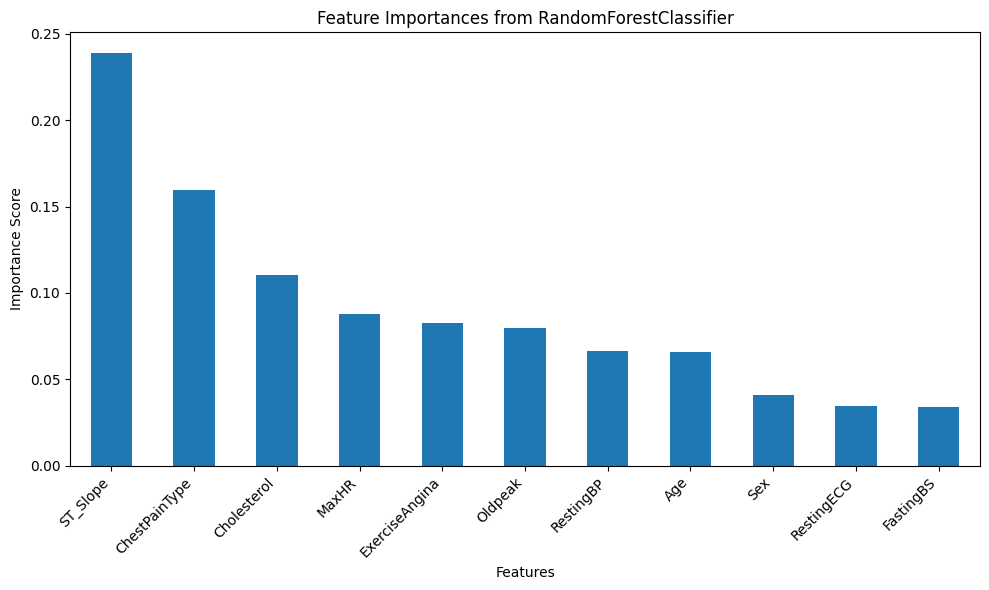

In [47]:
# 2. Model-based Feature Selection (e.g., using RandomForestClassifier)
# Using feature_importances_ attribute

print("\n--- Model-based Feature Selection (RandomForestClassifier) ---")

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train_resampled.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)

print("\nFeature Importances (RandomForestClassifier):")
print(feature_importances_sorted)

# Select features based on importance (e.g., top k or features with importance > threshold)
# Let's select the same number of features as SelectKBest for comparison
selected_features_rf_names = feature_importances_sorted.head(k_features).index.tolist()

print(f"\nTop {k_features} features selected by RandomForestClassifier:")
print(selected_features_rf_names)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances_sorted.plot(kind='bar')
plt.title('Feature Importances from RandomForestClassifier')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [81]:
chosen_features = selected_features_rf_names
print(f"\nChosen feature set for further experiments: {chosen_features}")

# Create new dataframes with only the chosen features
X_train_selected = X_train_resampled[chosen_features]
X_test_selected = X_test_processed[chosen_features] # Apply to the original test set (processed)

print("\nShape of training data with selected features:", X_train_selected.shape)
print("Shape of test data with selected features:", X_test_selected.shape)


Chosen feature set for further experiments: ['ST_Slope', 'ChestPainType', 'Cholesterol', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'RestingBP', 'Age']

Shape of training data with selected features: (14072, 8)
Shape of test data with selected features: (4328, 8)


In [84]:
# Use the selected features (8 features) for training and testing
X_train_final = X_train_selected  # Use the 8 chosen features
y_train_final = y_train_resampled
X_test_final = X_test_selected    # Use the 8 chosen features
y_test_final = y_test

# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine (SVC)": SVC(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42, algorithm='SAMME')
}
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n--- Training and evaluating {name} ---")
    clf.fit(X_train_final, y_train_final)
    y_pred = clf.predict(X_test_final)

    accuracy = accuracy_score(y_test_final, y_pred)
    precision = precision_score(y_test_final, y_pred)
    recall = recall_score(y_test_final, y_pred)
    f1 = f1_score(y_test_final, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Summarize results
print("\n--- Classification Results Summary  ---")
results_df = pd.DataFrame(results).T
print(results_df)


--- Training and evaluating Logistic Regression ---

--- Training and evaluating Support Vector Machine (SVC) ---

--- Training and evaluating Decision Tree ---

--- Training and evaluating Gradient Boosting Classifier ---

--- Training and evaluating AdaBoost Classifier ---

--- Classification Results Summary  ---
                              Accuracy  Precision    Recall  F1-Score
Logistic Regression           0.854436   0.940525  0.844444  0.889899
Support Vector Machine (SVC)  0.887246   0.939784  0.895522  0.917120
Decision Tree                 0.875000   0.938652  0.877944  0.907284
Gradient Boosting Classifier  0.898336   0.950017  0.901493  0.925119
AdaBoost Classifier           0.858595   0.941890  0.849420  0.893268



--- Performance Measures for Logistic Regression ---
Accuracy: 0.8544
Precision: 0.9405
Recall: 0.8444
F1-Score: 0.8899

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      1313
           1       0.94      0.84      0.89      3015

    accuracy                           0.85      4328
   macro avg       0.83      0.86      0.84      4328
weighted avg       0.87      0.85      0.86      4328


Confusion Matrix:
[[1152  161]
 [ 469 2546]]


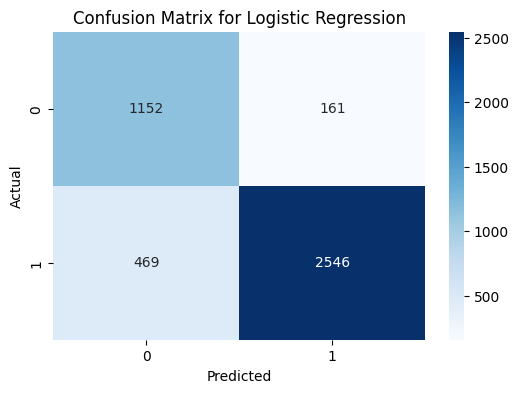


--- Performance Measures for Support Vector Machine (SVC) ---
Accuracy: 0.8872
Precision: 0.9398
Recall: 0.8955
F1-Score: 0.9171

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1313
           1       0.94      0.90      0.92      3015

    accuracy                           0.89      4328
   macro avg       0.86      0.88      0.87      4328
weighted avg       0.89      0.89      0.89      4328


Confusion Matrix:
[[1140  173]
 [ 315 2700]]


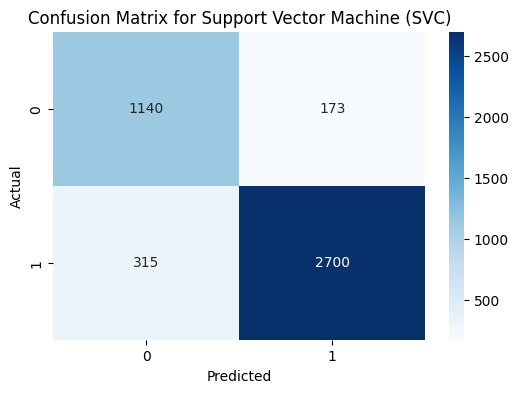


--- Performance Measures for Decision Tree ---
Accuracy: 0.8750
Precision: 0.9387
Recall: 0.8779
F1-Score: 0.9073

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1313
           1       0.94      0.88      0.91      3015

    accuracy                           0.88      4328
   macro avg       0.85      0.87      0.86      4328
weighted avg       0.88      0.88      0.88      4328


Confusion Matrix:
[[1140  173]
 [ 368 2647]]


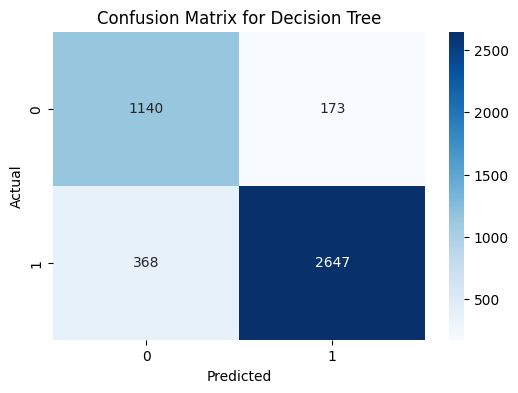


--- Performance Measures for Gradient Boosting Classifier ---
Accuracy: 0.8983
Precision: 0.9500
Recall: 0.9015
F1-Score: 0.9251

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1313
           1       0.95      0.90      0.93      3015

    accuracy                           0.90      4328
   macro avg       0.87      0.90      0.88      4328
weighted avg       0.90      0.90      0.90      4328


Confusion Matrix:
[[1170  143]
 [ 297 2718]]


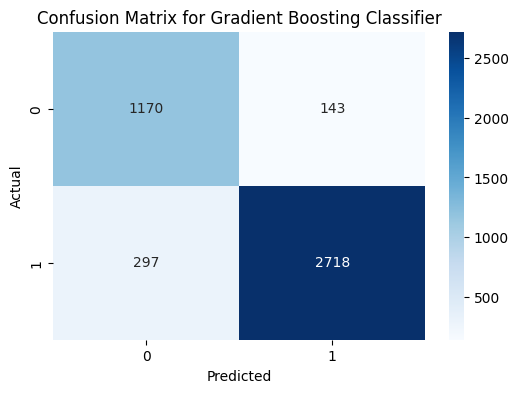


--- Performance Measures for AdaBoost Classifier ---
Accuracy: 0.8586
Precision: 0.9419
Recall: 0.8494
F1-Score: 0.8933

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      1313
           1       0.94      0.85      0.89      3015

    accuracy                           0.86      4328
   macro avg       0.83      0.86      0.84      4328
weighted avg       0.87      0.86      0.86      4328


Confusion Matrix:
[[1155  158]
 [ 454 2561]]


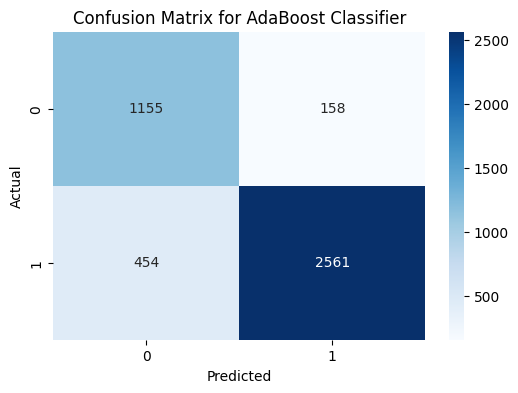


--- Classification Results Summary ---


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.854436,0.940525,0.844444,0.889899
Support Vector Machine (SVC),0.887246,0.939784,0.895522,0.917120
Decision Tree,0.875000,0.938652,0.877944,0.907284
Gradient Boosting Classifier,0.898336,0.950017,0.901493,0.925119
AdaBoost Classifier,0.858595,0.941890,0.849420,0.893268


In [85]:
# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n--- Performance Measures for {name} ---")
    clf.fit(X_train_final, y_train_final)
    y_pred = clf.predict(X_test_final)

    # Accuracy
    accuracy = accuracy_score(y_test_final, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision
    precision = precision_score(y_test_final, y_pred)
    print(f"Precision: {precision:.4f}")

    # Recall
    recall = recall_score(y_test_final, y_pred)
    print(f"Recall: {recall:.4f}")

    # F1-Score
    f1 = f1_score(y_test_final, y_pred)
    print(f"F1-Score: {f1:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test_final, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_final, y_pred)
    print(cm)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Summarize results (already done in the previous chunk, but repeating for completeness)
print("\n--- Classification Results Summary ---")
results_df = pd.DataFrame(results).T
results_df

In [86]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = {}

# Use X_train_selected and y_train_resampled if you want to use selected features
for name, clf in classifiers.items():
    print(f"\n--- Cross-Validation for {name} ---")
    scores = cross_val_score(clf, X_train_selected, y_train_resampled, cv=cv, scoring='f1')
    print(f"F1-scores across folds: {scores}")
    print(f"Mean F1-score: {scores.mean():.4f}, Std: {scores.std():.4f}")
    cross_val_results[name] = {
        "F1-Mean": scores.mean(),
        "F1-Std": scores.std()
    }

# Summarize cross-validation results
print("\n--- Cross-Validation Results Summary ---")
cv_results_df = pd.DataFrame(cross_val_results).T
print(cv_results_df)


--- Cross-Validation for Logistic Regression ---
F1-scores across folds: [0.84933427 0.85793872 0.84483986 0.8504772  0.84880825]
Mean F1-score: 0.8503, Std: 0.0043

--- Cross-Validation for Support Vector Machine (SVC) ---
F1-scores across folds: [0.87190083 0.87378641 0.85962474 0.87661895 0.86959554]
Mean F1-score: 0.8703, Std: 0.0058

--- Cross-Validation for Decision Tree ---
F1-scores across folds: [0.87920652 0.86586231 0.86774431 0.87851124 0.88002848]
Mean F1-score: 0.8743, Std: 0.0061

--- Cross-Validation for Gradient Boosting Classifier ---
F1-scores across folds: [0.89176883 0.89536517 0.89876543 0.90178259 0.89975204]
Mean F1-score: 0.8975, Std: 0.0035

--- Cross-Validation for AdaBoost Classifier ---
F1-scores across folds: [0.85406183 0.86226686 0.84804631 0.86550125 0.85857861]
Mean F1-score: 0.8577, Std: 0.0061

--- Cross-Validation Results Summary ---
                               F1-Mean    F1-Std
Logistic Regression           0.850280  0.004274
Support Vector Mac

In [87]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
import numpy as np

# Generate random classification data (e.g., 1000 samples, 8 features, 2 classes)
X_random, y_random = make_classification(
    n_samples=1000,
    n_features=8,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# Convert to DataFrame for compatibility
X_random_df = pd.DataFrame(X_random, columns=[f'feature_{i+1}' for i in range(8)])
y_random_series = pd.Series(y_random, name='target')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_cv_results = {}

for name, clf in classifiers.items():
    print(f"\n--- Cross-Validation on Random Data for {name} ---")
    fold = 1
    f1_scores = []
    for train_idx, test_idx in cv.split(X_random_df, y_random_series):
        X_train, X_test = X_random_df.iloc[train_idx], X_random_df.iloc[test_idx]
        y_train, y_test = y_random_series.iloc[train_idx], y_random_series.iloc[test_idx]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)
        print(f"\nFold {fold}:")
        print(f"Train indices: {train_idx[:10]} ... (total {len(train_idx)})")
        print(f"Test indices: {test_idx[:10]} ... (total {len(test_idx)})")
        print("First 3 rows of X_train:\n", X_train.head(3))
        print("First 3 rows of X_test:\n", X_test.head(3))
        print("First 10 y_train:", y_train.head(10).values)
        print("First 10 y_test:", y_test.head(10).values)
        print(f"F1-score for this fold: {f1:.4f}")
        fold += 1
    print(f"F1-scores across folds: {f1_scores}")
    print(f"Mean F1-score: {np.mean(f1_scores):.4f}, Std: {np.std(f1_scores):.4f}")
    random_cv_results[name] = {
        "F1-Mean": np.mean(f1_scores),
        "F1-Std": np.std(f1_scores)
    }

# Summarize cross-validation results on random data
print("\n--- Cross-Validation Results Summary (Random Data) ---")
random_cv_results_df = pd.DataFrame(random_cv_results).T
print(random_cv_results_df)


--- Cross-Validation on Random Data for Logistic Regression ---

Fold 1:
Train indices: [ 0  2  3  4  5  6  7  8  9 10] ... (total 800)
Test indices: [ 1 11 15 20 25 27 32 44 47 48] ... (total 200)
First 3 rows of X_train:
    feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -1.732538   5.260112  -2.952194  -4.603768   2.235848   1.928893   
2  -0.263106   1.527781  -1.872414  -0.028009   1.612809   3.264194   
3  -0.164349  -0.550131  -0.019503  -0.765000   2.273523   2.084217   

   feature_7  feature_8  
0  -0.101845   3.193487  
2  -1.296421   1.537870  
3  -0.321931   0.426253  
First 3 rows of X_test:
     feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
1    2.072914   2.240572  -1.385104  -2.514962  -0.984756   1.436260   
11   0.995707   3.948284  -1.538950  -3.621765   0.013286   1.582491   
15  -4.021862   6.288589  -2.014751  -3.238884   1.039333   0.687733   

    feature_7  feature_8  
1   -1.255271   2.089872  
11  -1.312993   3.

In [88]:
import joblib
import os

# Create a directory for models if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save each trained model
joblib.dump(classifiers["Logistic Regression"], "models/logistic_regression.pkl")
joblib.dump(classifiers["Support Vector Machine (SVC)"], "models/svc.pkl")
joblib.dump(classifiers["Decision Tree"], "models/decision_tree.pkl")
joblib.dump(classifiers["Gradient Boosting Classifier"], "models/gradient_boosting.pkl")
joblib.dump(classifiers["AdaBoost Classifier"], "models/adaboost.pkl")

print("Models saved in the 'models' directory.")

# To download in Jupyter, you can use:
from IPython.display import FileLink, display

for model_file in [
    "models/logistic_regression.pkl",
    "models/svc.pkl",
    "models/decision_tree.pkl",
    "models/gradient_boosting.pkl",
    "models/adaboost.pkl"
]:
    display(FileLink(model_file))

Models saved in the 'models' directory.


c:\Users\Muzam\OneDrive\Desktop\MLProject\DS1\models\logistic_regression.pkl

c:\Users\Muzam\OneDrive\Desktop\MLProject\DS1\models\svc.pkl

c:\Users\Muzam\OneDrive\Desktop\MLProject\DS1\models\decision_tree.pkl

c:\Users\Muzam\OneDrive\Desktop\MLProject\DS1\models\gradient_boosting.pkl

c:\Users\Muzam\OneDrive\Desktop\MLProject\DS1\models\adaboost.pkl